In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
posts_df, comments_df = pd.read_csv('data/all_posts-merged.csv'), pd.read_csv('data/all_comments-merged.csv')

In [10]:
comments_df.shape

(783917, 11)

In [11]:
post_usernames = posts_df['username'].dropna().unique()
comment_usernames = comments_df['username'].dropna().unique()

# Combine the usernames and remove duplicates
all_usernames = set(post_usernames).union(set(comment_usernames))

# Convert the set back to a list if needed
unique_usernames = list(all_usernames)

print(f"Total unique usernames: {len(unique_usernames)}")
# print(unique_usernames)

Total unique usernames: 314529


In [12]:
usernames_series = pd.Series(unique_usernames)

bot_part = ["bot", "admin", "mod", "auto", "helper", "assist", "news", "alert", "info"]

# Use str.contains to filter usernames containing "bot" (case-insensitive)
pattern = '|'.join(bot_part)

bot_usernames = usernames_series[usernames_series.str.contains(pattern, case=False)]
unique_bot_usernames = bot_usernames.unique()

print(f"List of usernames containing any of {bot_part}: {list(unique_bot_usernames)}")
print(f"Number of such usernames: {len(unique_bot_usernames)}")

List of usernames containing any of ['bot', 'admin', 'mod', 'auto', 'helper', 'assist', 'news', 'alert', 'info']: ['modsruinthisapp', 'Automate_This_66', 'truth-informant', 'information_abyss', 'Girlmode', 'NewsFromYourBed', 'mrPandabot35', 'AfroInfo', 'Curious-Bottle-7391', 'gizmodilla', 'HogSliceFurBottom', 'immodest_escort', 'botsauce', 'khymbote', 'shasbot', 'Reasonable_Assist_63', 'botdrip1', 'biffbot13', 'Obsolete_Robot', 'Curses_at_bots', 'BigRedRobotNinja', 'themodfatherinc', 'ITAdminNoFirewall', 'rockbottomtraveler', 'ModernSimian', 'Unique_Assistant6076', 'modcowboy', 'Westtexasbizbot', 'RotANobot', 'Unumbotte', 'AutoIsVeryCool', 'Automatic_Net2181', 'Minute_Assistant2930', 'NewSlide6857', 'UpYoursMods', 'Both_Lychee_1708', 'WorldnewsModsBlowMe', 'GigaCringeMods', 'littlebrwnrobot', 'O-bot54', 'Both-Ad1801', 'Both-Camera-2924', 'AutomaticDog3770', 'LEDDITmodsARElosers', 'ThisIsTheNewSleeve', 'RobotXander', 'No_News_1712', 'tomodachi_reloaded', 'Informal-Copy-2440', 'iStealyou

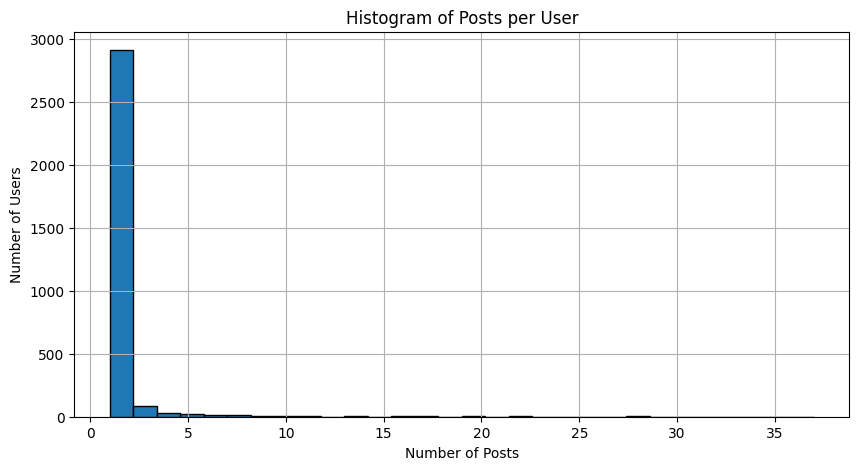

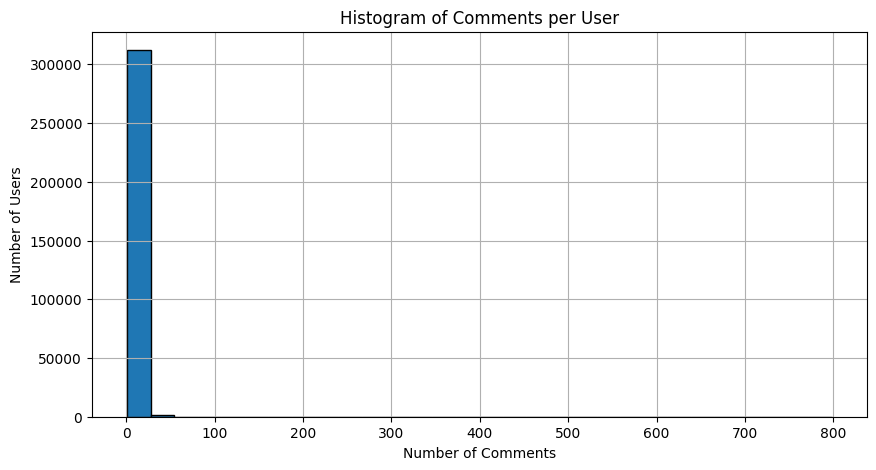

In [13]:
# Count the number of posts per user
posts_per_user = posts_df['username'].value_counts()

# Count the number of comments per user
comments_per_user = comments_df['username'].value_counts()

# Plot the histogram of posts per user
plt.figure(figsize=(10, 5))
plt.hist(posts_per_user, bins=30, edgecolor='black')
plt.title('Histogram of Posts per User')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Plot the histogram of comments per user
plt.figure(figsize=(10, 5))
plt.hist(comments_per_user, bins=30, edgecolor='black')
plt.title('Histogram of Comments per User')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

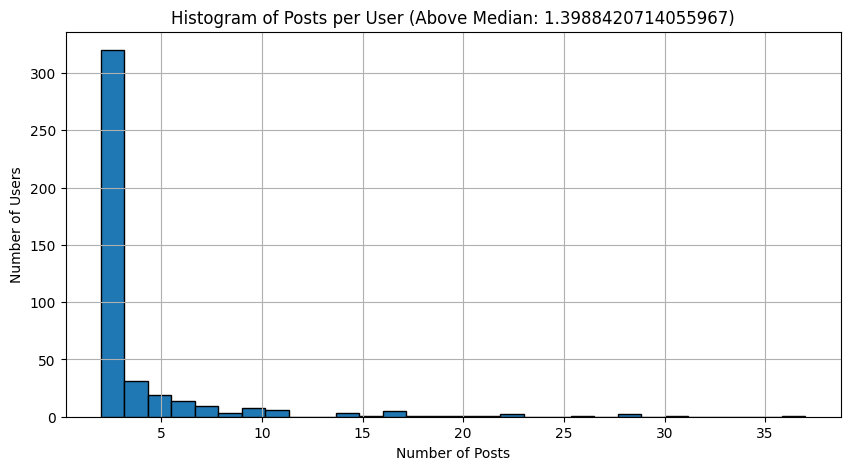

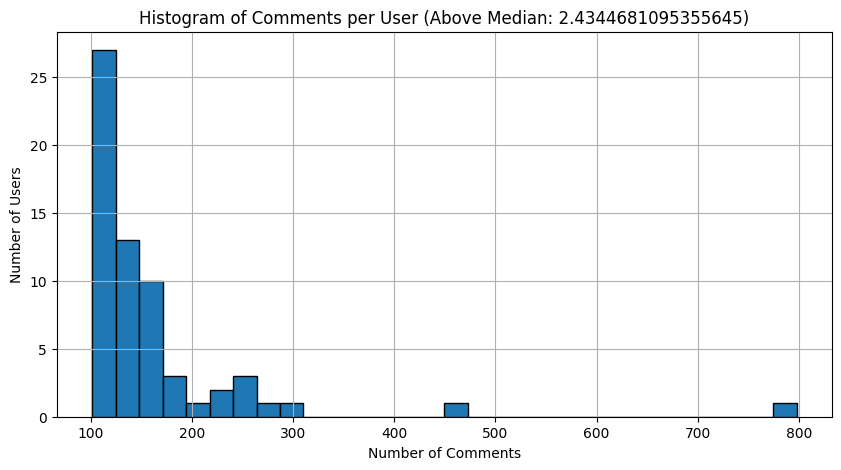

In [14]:
posts_median = posts_per_user.mean()
comments_median = comments_per_user.mean()

posts_above_median = posts_per_user[posts_per_user > posts_median]
comments_above_median = comments_per_user[comments_per_user > 100]

# Plot the histogram of posts per user above the median
plt.figure(figsize=(10, 5))
plt.hist(posts_above_median, bins=30, edgecolor='black')
plt.title(f'Histogram of Posts per User (Above Median: {posts_median})')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Plot the histogram of comments per user above the median
plt.figure(figsize=(10, 5))
plt.hist(comments_above_median, bins=30, edgecolor='black')
plt.title(f'Histogram of Comments per User (Above Median: {comments_median})')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()